# Decision Tree
This algorithm is amongst the simplest and fastest classification algorithm.  
The classification takes place in a series of decisions and the procedure will be clear to you by the end of the notebook.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.impute import KNNImputer
from sklearn.tree import *
from sklearn.metrics import f1_score

# Loading Dataset

In [3]:
data = pd.read_csv("D:\Research\Multiclass\DecisionTrees\Dataset\ecoli.csv")
data.head()

,c1,c2,c3,c4,c5,c6,c7,c8
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,1
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,1
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,1
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,1
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,1


# Histogram Plots

array([[<AxesSubplot: title={'center': 'c1'}>,
        <AxesSubplot: title={'center': 'c2'}>,
        <AxesSubplot: title={'center': 'c3'}>],
       [<AxesSubplot: title={'center': 'c4'}>,
        <AxesSubplot: title={'center': 'c5'}>,
        <AxesSubplot: title={'center': 'c6'}>],
       [<AxesSubplot: title={'center': 'c7'}>,
        <AxesSubplot: title={'center': 'c8'}>, <AxesSubplot: >]],
      dtype=object)

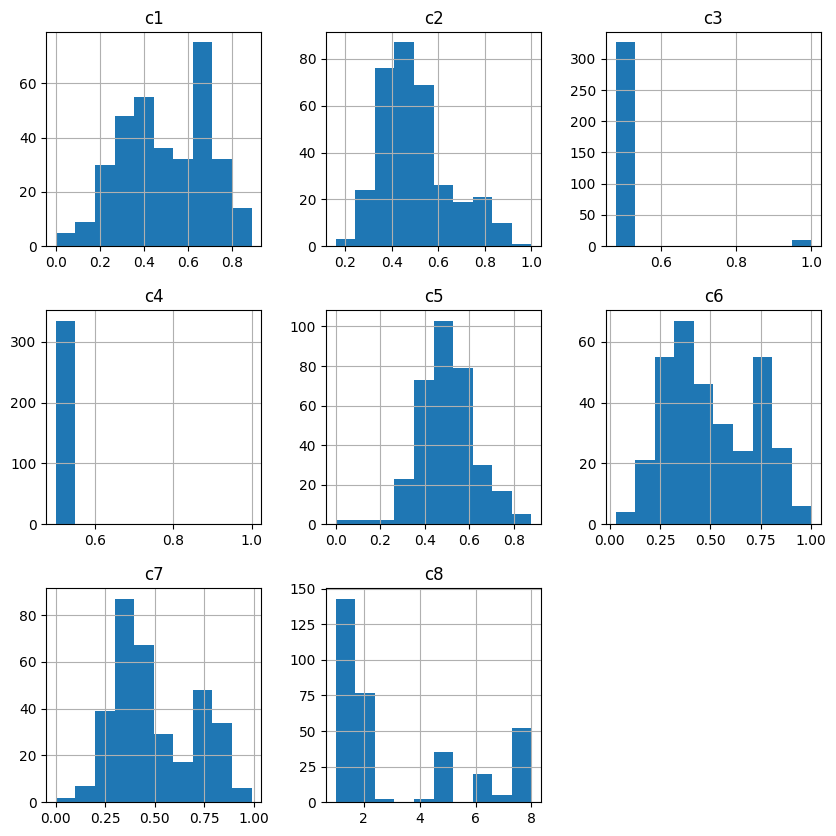

In [4]:
data.hist(figsize=(10,10))

# Other Properties

In [6]:
data.nunique()

c1     126
c2     133
c3      79
c4      63
c5      53
c6      97
c7     132
c8      39
c9     101
c10    132
c11     78
c12    122
c13    121
c14      3
dtype: int64

In [7]:
data.isna().sum()

c1     0
c2     0
c3     0
c4     0
c5     0
c6     0
c7     0
c8     0
c9     0
c10    0
c11    0
c12    0
c13    0
c14    0
dtype: int64

In [8]:
data.stroke.value_counts()

AttributeError: 'DataFrame' object has no attribute 'stroke'

As the dataset is highly imbalanced, we'll go for startified split rather than train test split.  
Startified Split, balances the ration of train and test target variables as in original dataset, to represent population

In [9]:
data.describe()

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


# One Hot Encoding Categorical Variables

In [11]:
cat = ['c1','c2','c3','c4','c5','c6','c7','c8','c9','c10','c11','c12','c13','c14']
for i in cat:
    dummy = pd.get_dummies(data[i],drop_first=True,prefix=f"{i}_")
    data = pd.concat([data,dummy],axis=1)

In [12]:
data.head()

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,...,c13__1320,c13__1375,c13__1450,c13__1480,c13__1510,c13__1515,c13__1547,c13__1680,c14__2,c14__3
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,...,0,0,0,0,0,0,0,0,0,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,...,0,0,0,0,0,0,0,0,0,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,...,0,0,0,0,0,0,0,0,0,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,...,0,0,0,1,0,0,0,0,0,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,...,0,0,0,0,0,0,0,0,0,0


In [13]:
data = data.drop([*cat,'id'],axis=1)

KeyError: "['id'] not found in axis"

In [14]:
data.head()

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,...,c13__1320,c13__1375,c13__1450,c13__1480,c13__1510,c13__1515,c13__1547,c13__1680,c14__2,c14__3
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,...,0,0,0,0,0,0,0,0,0,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,...,0,0,0,0,0,0,0,0,0,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,...,0,0,0,0,0,0,0,0,0,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,...,0,0,0,1,0,0,0,0,0,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,...,0,0,0,0,0,0,0,0,0,0


In [16]:
data.corrwith(data['c14'])

c1          -0.328222
c2           0.437776
c3          -0.049643
c4           0.517859
c5          -0.209179
               ...   
c13__1515   -0.091246
c13__1547   -0.091246
c13__1680   -0.091246
c14__2       0.065135
c14__3       0.834820
Length: 1279, dtype: float64

# Train and Test

In [19]:
X = data.drop('c14',axis=1).values
y = data['c14'].values

In [34]:
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X, y)
from sklearn.metrics import *

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    imputer = KNNImputer(n_neighbors=2)
    X_train = imputer.fit_transform(X_train)
    X_test = imputer.fit_transform(X_test)
    
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f = f1_score(y_true = y_test , y_pred = y_pred,average = 'weighted')
    a=accuracy_score(y_true = y_test , y_pred = y_pred, normalize=False)
    print(f)
    print("x")
    print(a/(accuracy_score(y_true = y_test , y_pred = y_pred, normalize=True)+a))


1.0
x
0.972972972972973
1.0
x
0.972972972972973
1.0
x
0.972972972972973
1.0
x
0.9722222222222222
1.0
x
0.9722222222222222


**Note** Preprocessing techniques are avoided here to represent True Decision Tree.  
It shall be done to increase overall accuracy

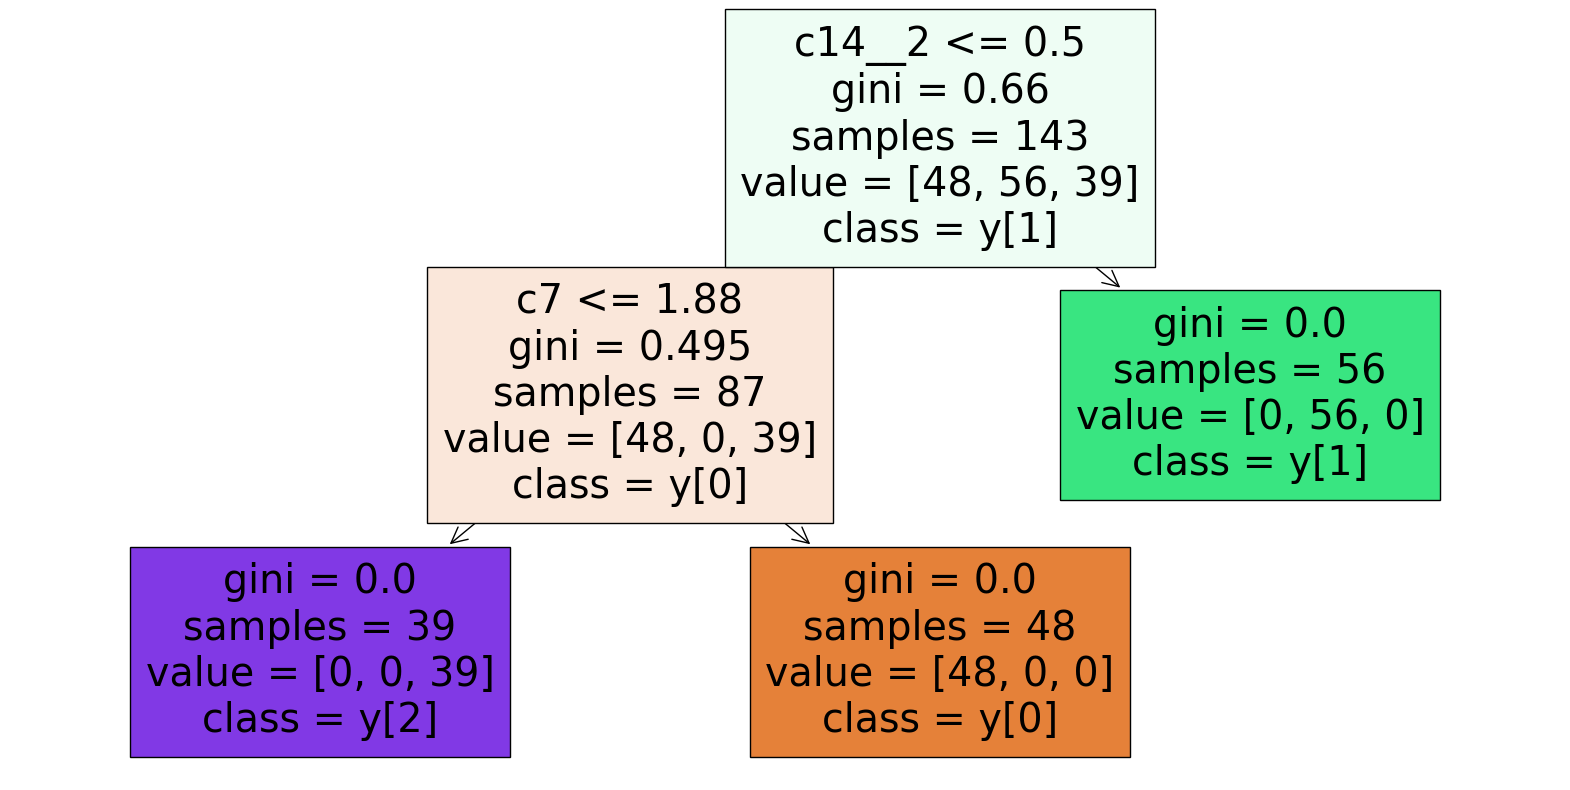

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(clf,feature_names=data.drop('c14',axis=1).columns,max_depth = 2,filled=True,class_names = True)
plt.show()

You can learn aboout this graph and it's interpretation from [here](https://towardsdatascience.com/understanding-decision-trees-once-and-for-all-2d891b1be579)  
Happy Learning